In [24]:
install.packages("rstan")
install.packages("brms")
library(rstan)
library(brms)

rstan_options(auto_write=TRUE)
options(mc.cores = parallel::detectCores())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
head(CO2)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2


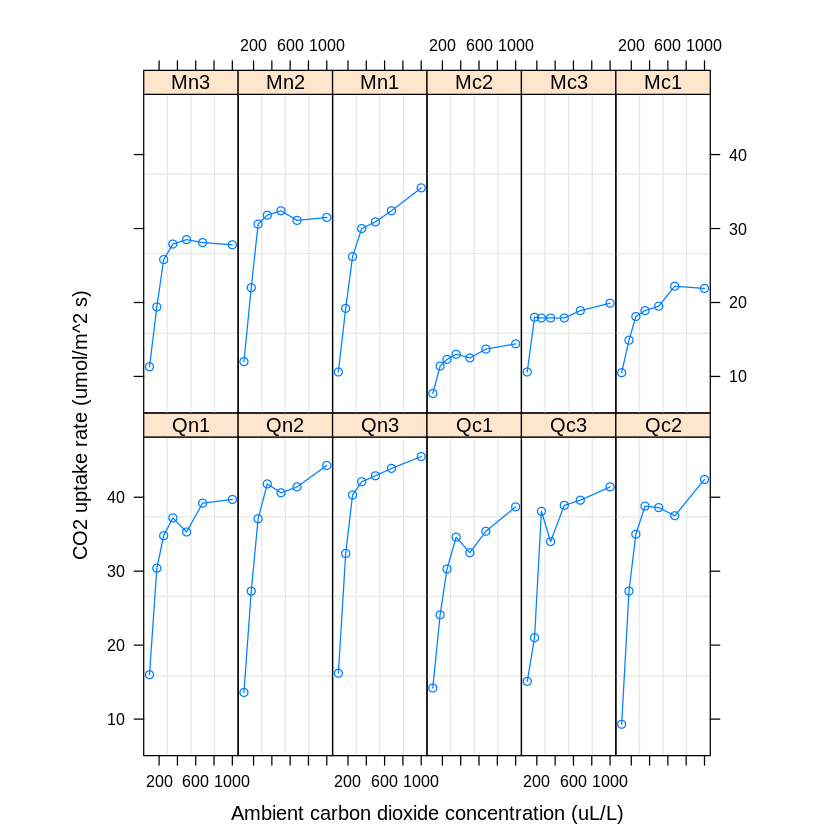

In [26]:
plot(CO2)

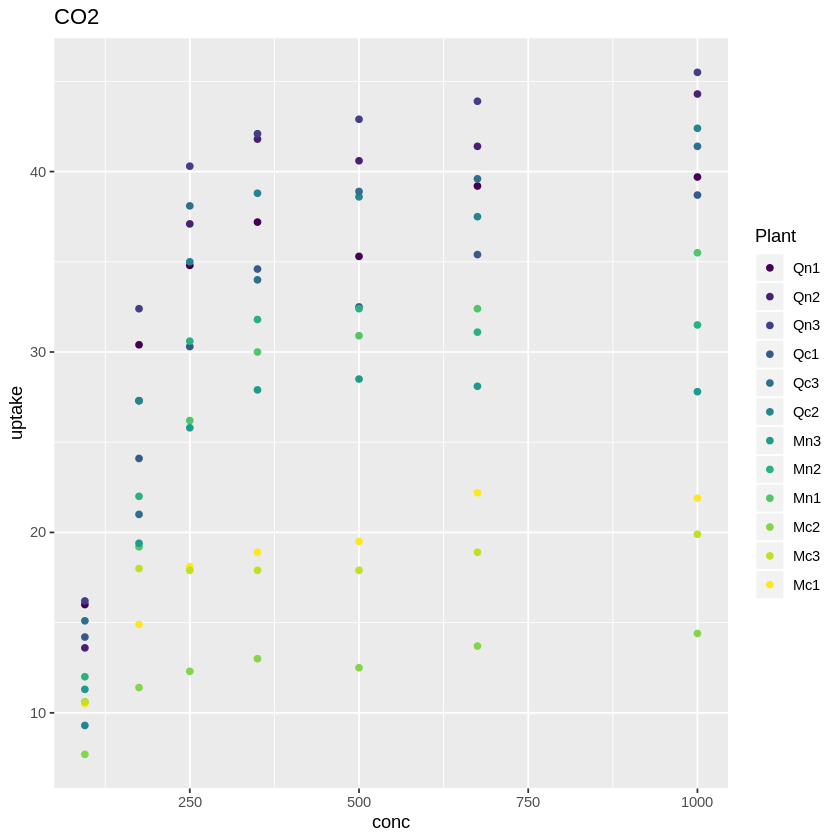

In [27]:
# 使いたい列だけ抽出して内容の確認
library(dplyr)
df <- select(.data = CO2, Plant, Type, conc, uptake)
ggplot(data=df, mapping = aes(x=conc, y=uptake)) + geom_point(aes(color = Plant))+ labs(title="CO2")

In [40]:
glmm_poiss_brms <- brm(
    formula = uptake ~   conc + Type + (1|Plant),
    family = gaussian(),
    data = CO2,
    seed = 1,
    prior = c(
        set_prior("", class = "Intercept")
    )
)

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



Warning message:
“Method 'stanplot' is deprecated. Please use 'mcmc_plot' instead.”


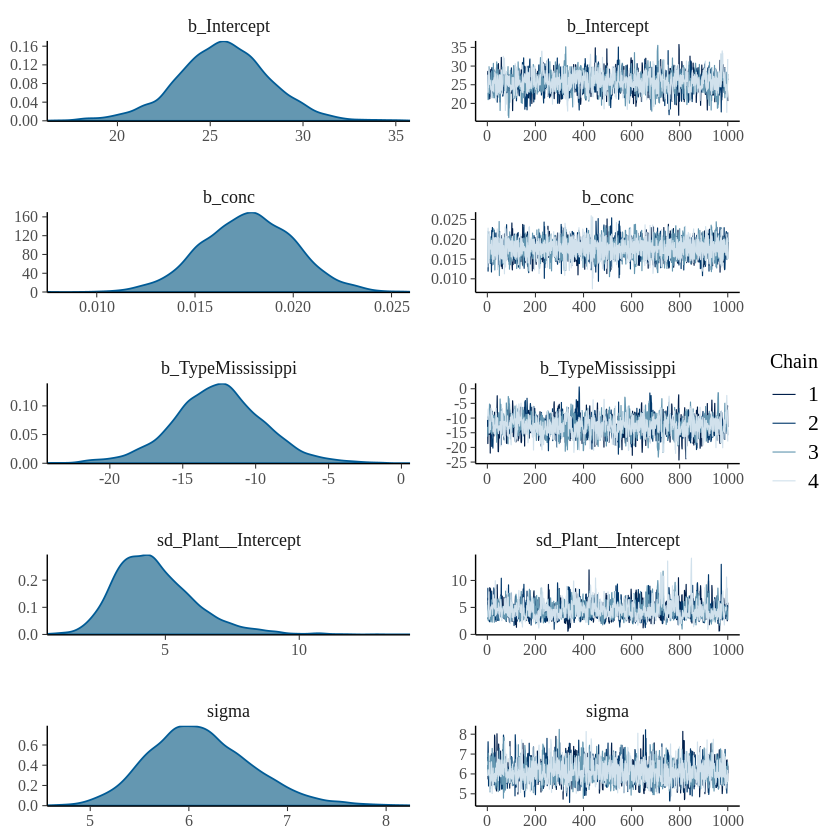

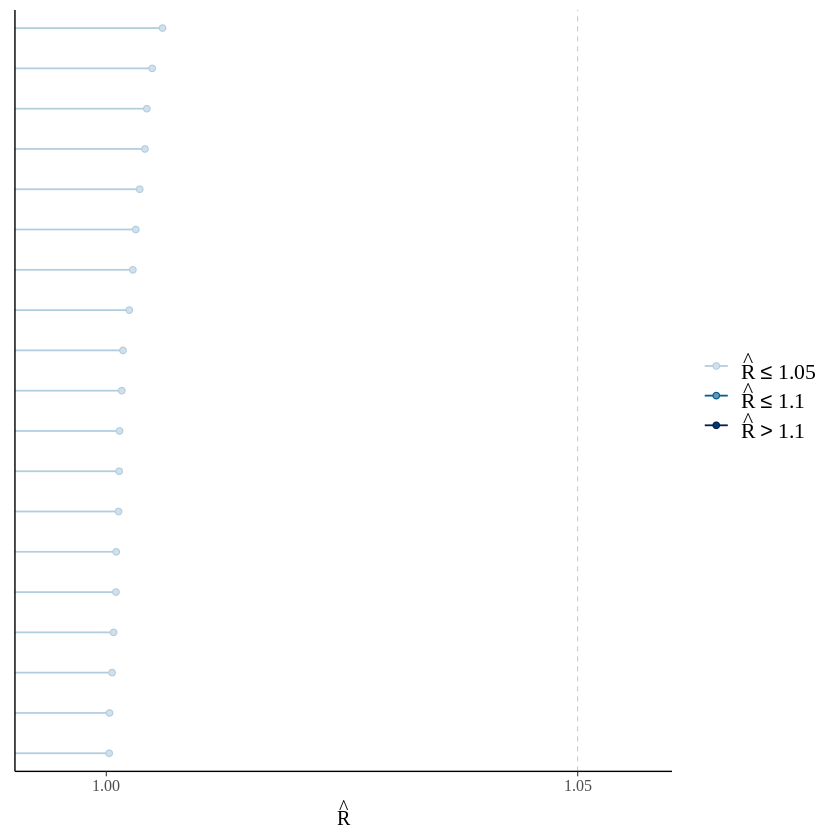

In [41]:
plot(glmm_poiss_brms)
stanplot(glmm_poiss_brms, type="rhat")

Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”


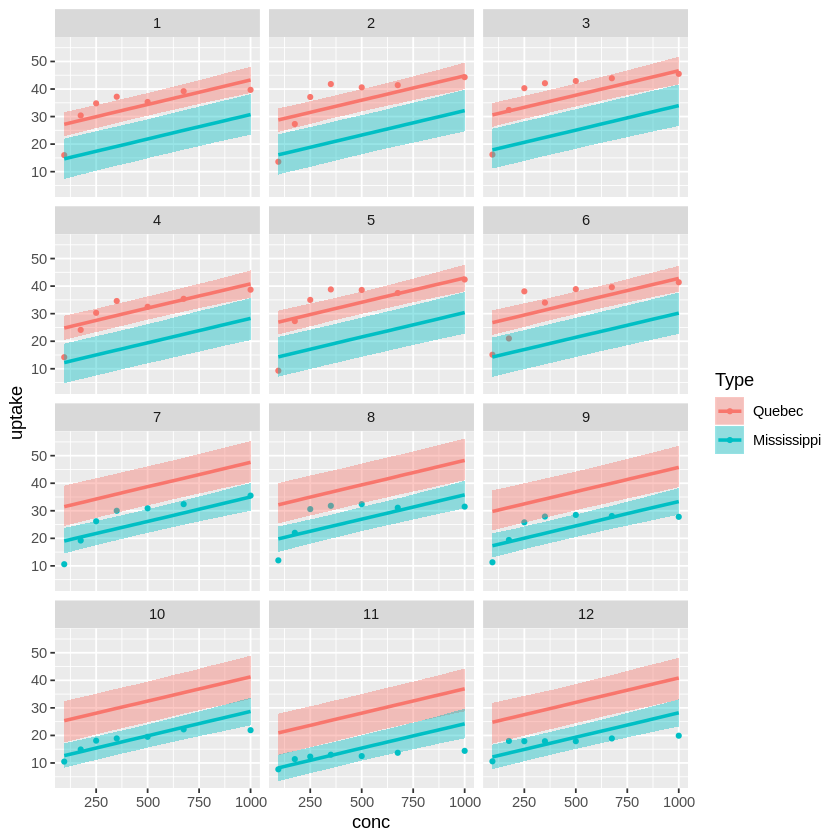

In [43]:
conditions <- data.frame(
 Plant = c("Qn1", "Qn2","Qn3","Qc1", "Qc2","Qc3","Mn1", "Mn2","Mn3","Mc1", "Mc2","Mc3"))

eff_glmm <- marginal_effects(
    glmm_poiss_brms,
    effects = "conc:Type",
    re_formula = NULL,
    conditions = conditions
)

plot(eff_glmm, points = TRUE)

Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”


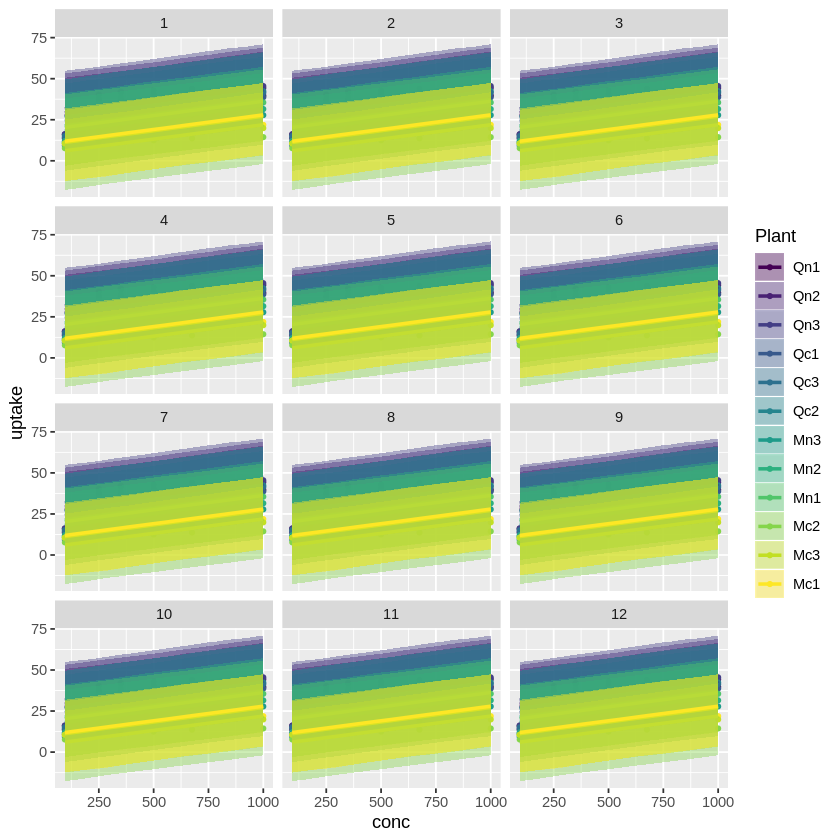

In [31]:
conditions <- data.frame(
 Plant = c("Qn1", "Qn2","Qn3","Qc1", "Qc2","Qc3","Mn1", "Mn2","Mn3","Mc1", "Mc2","Mc3"))

eff_glmm <- marginal_effects(
    glmm_poiss_brms,
    effects = "conc:Plant",
    re_formula = NULL,
    conditions = conditions
)

plot(eff_glmm, points = TRUE)

In [37]:
glmm_poiss_brms <- brm(
    formula = uptake ~   conc + Type + (Type||Plant),
    family = gaussian(),
    data = CO2,
    seed = 1,
    prior = c(
        set_prior("", class = "Intercept")
    )
)

Compiling the C++ model

Start sampling

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


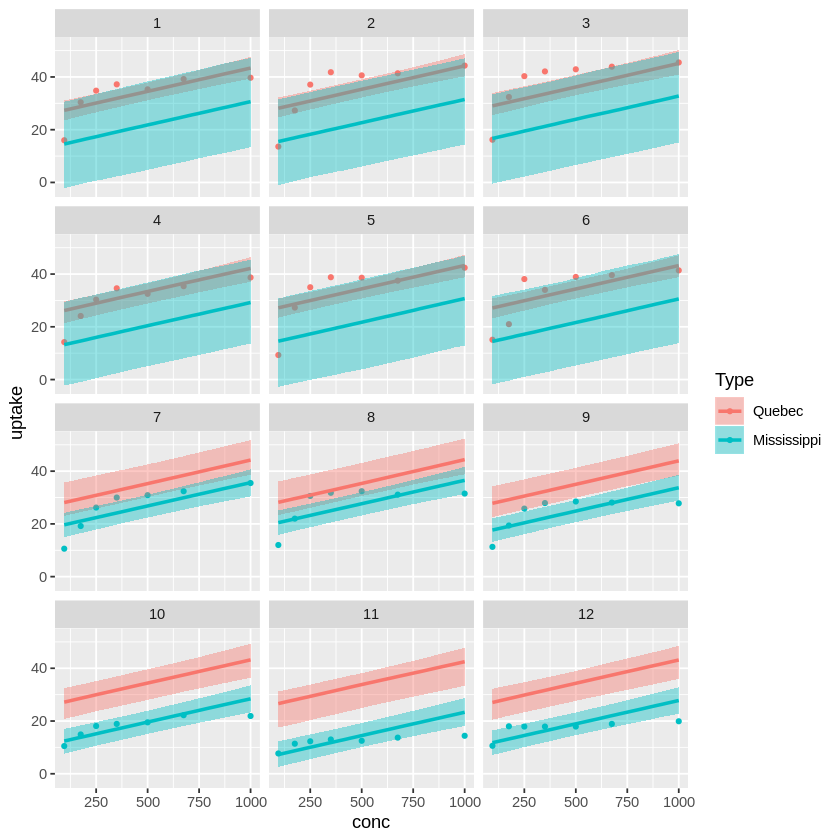

In [39]:
conditions <- data.frame(
 Plant = c("Qn1", "Qn2","Qn3","Qc1", "Qc2","Qc3","Mn1", "Mn2","Mn3","Mc1", "Mc2","Mc3"))

eff_glmm <- conditional_effects(
    glmm_poiss_brms,
    effects = "conc:Type",
    re_formula = NULL,
    conditions = conditions
)

plot(eff_glmm, points = TRUE)